Creating CSV files

In [6]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

Mount the Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Preprocess the Data: Load the images, resize them and create labels.

In [8]:
# Directory containing the uploaded images
image_dir = '/content/drive/My Drive/Plant_CV_Model/Data'

In [9]:
image_paths = []
labels = []

Load the Dataset and Class Labels

In [10]:
for root, dirs, files in os.walk(image_dir):
    for filename in files:
        if 'Alternanthera_sessilis' in root:
            image_paths.append(os.path.join(root, filename))
            labels.append(0)
        elif 'chilly_plant' in root:
            image_paths.append(os.path.join(root, filename))
            labels.append(1)

In [11]:
# Create a DataFrame to store image paths and labels
df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

In [12]:
# Define the paths for the CSV files
train_csv_path = '/content/drive/My Drive/Plant_CV_Model/train.csv'
test_csv_path = '/content/drive/My Drive/Plant_CV_Model/test.csv'

In [13]:
# Directories
train_dir = "/content/drive/My Drive/Plant_CV_Model/data"
class_dirs = ["Alternanthera_sessilis", "chilly_plant"]
test_dir = "/content/drive/My Drive/Plant_CV_Model/data/test"  # Adjust if different

# Initialize lists for data
data = []
test_data = []

# Populate training data
for class_id, class_name in enumerate(class_dirs):
    class_path = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_path):
        data.append({
            'image_path': os.path.join(class_path, filename),
            'label': class_id  # 0 for Alternanthera_sessilis, 1 for chilly_plant
        })

# If you have a separate test directory and want to load it
for filename in os.listdir(test_dir):
    test_data.append({
        'image_path': os.path.join(test_dir, filename),
        'label': None  # You may need to manually label or have a scheme for labeling test data
    })

# Convert to DataFrame
df = pd.DataFrame(data)
test_df = pd.DataFrame(test_data)  # Only if you loaded test data

# Now df is your training DataFrame, you can split it if you need a validation set
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
# Save the training and testing DataFrames as CSV files
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

In [15]:
print(f"CSV files saved:\n- Training CSV: {train_csv_path}\n- Testing CSV: {test_csv_path}")

CSV files saved:
- Training CSV: /content/drive/My Drive/Plant_CV_Model/train.csv
- Testing CSV: /content/drive/My Drive/Plant_CV_Model/test.csv


Develop the CNN Algorithm

In [16]:
# Define image size
image_height, image_width = 400, 400

# Define the paths for the CSV files (change these paths as needed)
train_csv_path = '/content/drive/My Drive/Plant_CV_Model/train.csv'
test_csv_path = '/content/drive/My Drive/Plant_CV_Model/test.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


In [17]:
# Load and preprocess the images
def preprocess_images(image_paths, target_size=(image_height, image_width)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

In [18]:
X_train = preprocess_images(train_df['image_path'])
X_test = preprocess_images(test_df['image_path'])

# Assuming the label column is correctly named as 'label'
Y_train = train_df['label'].values
Y_test = test_df['label'].values


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (142014889 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [19]:
X_train = X_train.reshape(len(X_train), 400, 400, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 400, 400, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (459, 400, 400, 3)
Shape of Y_train:  (459, 1)
Shape of X_test:  (38, 400, 400, 3)
Shape of Y_test:  (38, 1)


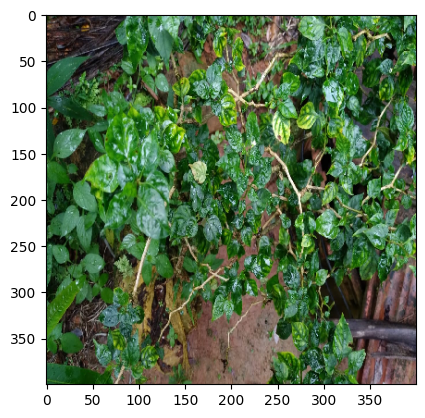

In [20]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx, :])
plt.show()


In [21]:
# Create a CNN model for binary classification
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

In [22]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
15/15 [==============================] - 82s 5s/step - loss: 0.5967 - accuracy: 0.7190
Epoch 2/10
15/15 [==============================] - 82s 5s/step - loss: 0.5163 - accuracy: 0.7691
Epoch 3/10
15/15 [==============================] - 78s 5s/step - loss: 0.4744 - accuracy: 0.7691
Epoch 4/10
15/15 [==============================] - 79s 5s/step - loss: 0.4308 - accuracy: 0.7756
Epoch 5/10
15/15 [==============================] - 79s 5s/step - loss: 0.4215 - accuracy: 0.7996
Epoch 6/10
15/15 [==============================] - 79s 5s/step - loss: 0.3222 - accuracy: 0.8715
Epoch 7/10
15/15 [==============================] - 81s 5s/step - loss: 0.3033 - accuracy: 0.8780
Epoch 8/10
15/15 [==============================] - 79s 5s/step - loss: 0.1895 - accuracy: 0.9303
Epoch 9/10
15/15 [==============================] - 81s 5s/step - loss: 0.1014 - accuracy: 0.9782
Epoch 10/10
15/15 [==============================] - 79s 5s/step - loss: 0.0458 - accuracy: 0.9935


In [24]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Test accuracy: {accuracy}")

2/2 [==============================] - 2s 251ms/step - loss: nan - accuracy: 0.0000e+00
Test accuracy: 0.0


In [25]:
# Save the trained model
model.save('/content/drive/My Drive/Plant_CV_Model/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Images

In [26]:
# Load the trained model
model = load_model('/content/drive/My Drive/Plant_CV_Model/trained_model.h5')

In [27]:
# Use the model to predict labels for the test images
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert softmax outputs to class labels

2/2 [==============================] - 2s 265ms/step


In [30]:
# Assuming 'predicted_labels' is defined somewhere in your code with predictions for each image in 'test_df'
output_df = pd.DataFrame({'Image_Path': test_df['image_path'], 'Predicted_Label': predicted_labels})


In [31]:
# Save the output DataFrame as a CSV file (you can change the output path)
output_csv_path = '/content/drive/My Drive/Plant_CV_Model/predicted_labels.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Predicted labels saved to: {output_csv_path}")

Predicted labels saved to: /content/drive/My Drive/Plant_CV_Model/predicted_labels.csv


Cheking original images

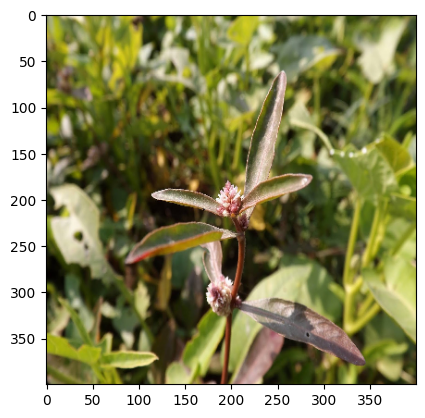

In [32]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model evaluation

In [33]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 2s 253ms/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

1/1 [==============================] - 0s 63ms/step


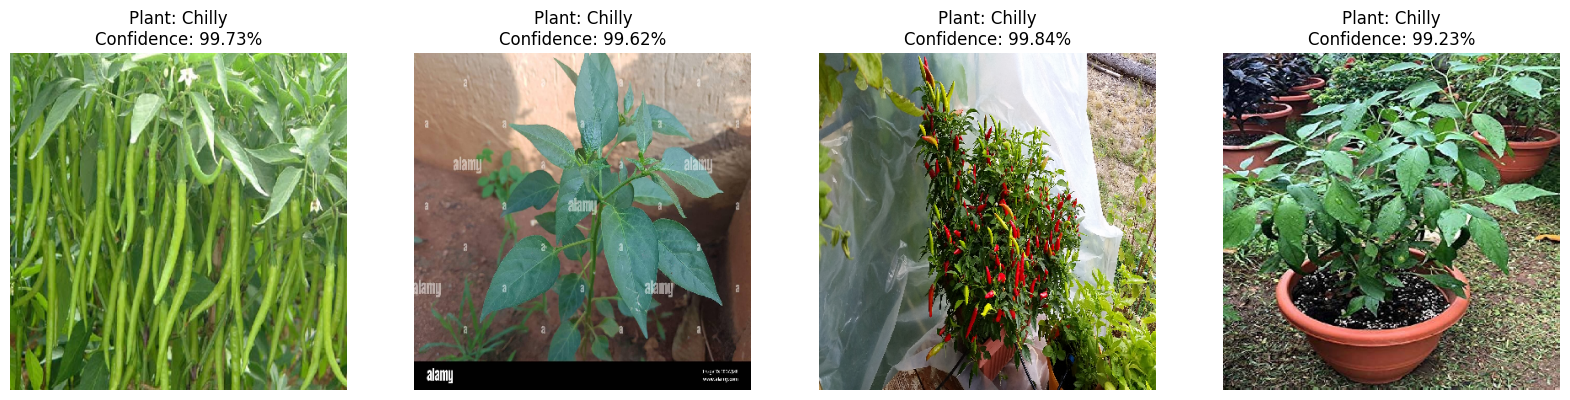

In [39]:
idxs = random.sample(range(len(Y_test)), 4)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, idx in enumerate(idxs):
    y_pred = model.predict(X_test[idx].reshape(1, 400, 400, 3))

    pred_class = 'Chilly' if y_pred >= 0.5 else 'Mukunuwenna'
    confidence = f"{y_pred[0][0] * 100:.2f}%" if pred_class == 'Chilly' else f"{(1 - y_pred[0][0]) * 100:.2f}%"

    axs[i].imshow(X_test[idx])
    axs[i].set_title(f"Plant: {pred_class}\nConfidence: {confidence}")
    axs[i].axis('off')

plt.show()